In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [2]:
#Load the data
df = pd.read_csv('cars_train.csv', sep='\t', header=0, encoding="utf-16")

In [3]:
df.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


In [4]:
df.isnull().sum()

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [7]:
df.shape

(29584, 29)

In [8]:
df.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,veiculo_alienado,preco
count,29407.000000,29584.000000,29584.000000,29584.000000,29584.000000,0.0,2.958400e+04
mean,10.323834,2016.758552,2017.808985,58430.592077,3.940677,NaN,1.330239e+05
std,3.487334,4.062422,2.673930,32561.769309,0.338360,NaN,8.166287e+04
min,8.000000,1985.000000,1997.000000,100.000000,2.000000,NaN,9.869951e+03
25%,8.000000,2015.000000,2016.000000,31214.000000,4.000000,NaN,7.657177e+04
50%,8.000000,2018.000000,2018.000000,57434.000000,4.000000,NaN,1.143558e+05
75%,14.000000,2019.000000,2020.000000,81953.500000,4.000000,NaN,1.636796e+05
max,21.000000,2022.000000,2023.000000,390065.000000,4.000000,NaN,1.359813e+06


In [9]:
df

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,40985083650499509711752444068313401704,8.0,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,2021,2021.0,8150.0,Automática,4,...,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,403015.289616
29580,164663177589009976281210123914772747797,8.0,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMÁTICO,2020,2020.0,17987.0,Automática,4,...,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,88978.080497
29581,170866287186047465472146212778882034162,8.0,TOYOTA,HILUX,2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMÁTICO,2019,2019.0,44742.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218807.648664
29582,208909739337040262669325459666578363437,8.0,PEUGEOT,2008,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,2021,2022.0,35376.0,Automática,4,...,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,68495.990693


In [10]:
booleans = ['blindado','entrega_delivery','troca','elegivel_revisao','dono_aceita_troca','veiculo_único_dono','revisoes_concessionaria','ipva_pago','veiculo_licenciado','garantia_de_fábrica','revisoes_dentro_agenda']
numericas = ['num_fotos','ano_de_fabricacao','ano_modelo','hodometro','num_portas','veiculo_alienado','preco']
strings = ['marca','modelo','versao','cambio','tipo','cor','tipo_vendedor','cidade_vendedor','estado_vendedor','anunciante']

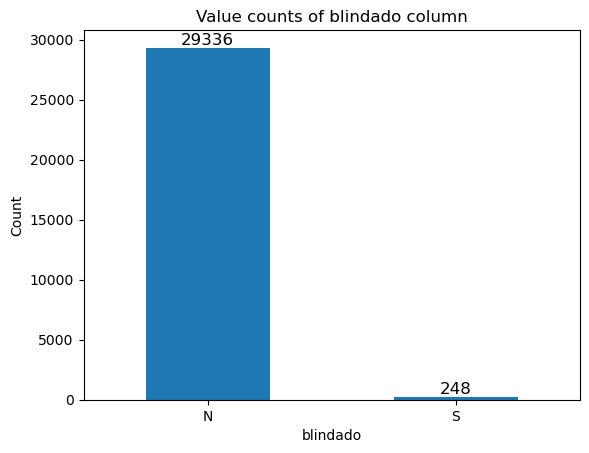

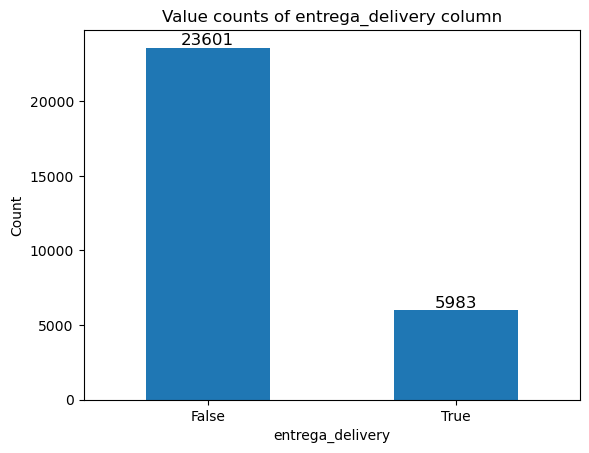

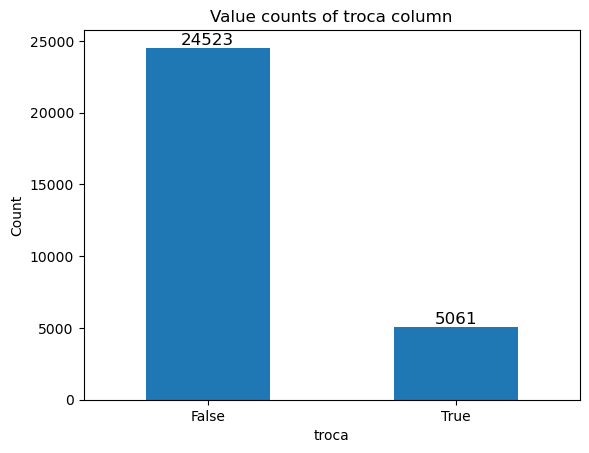

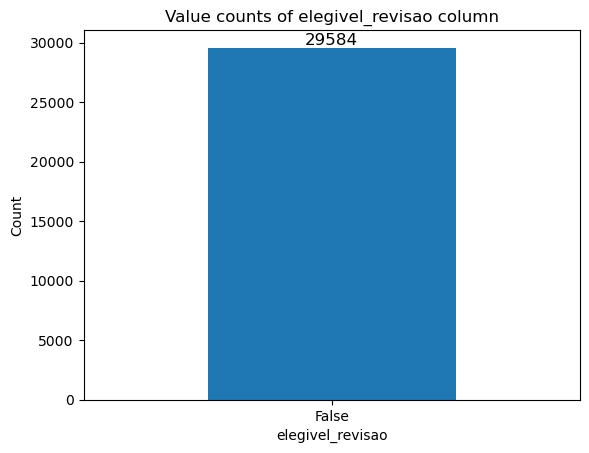

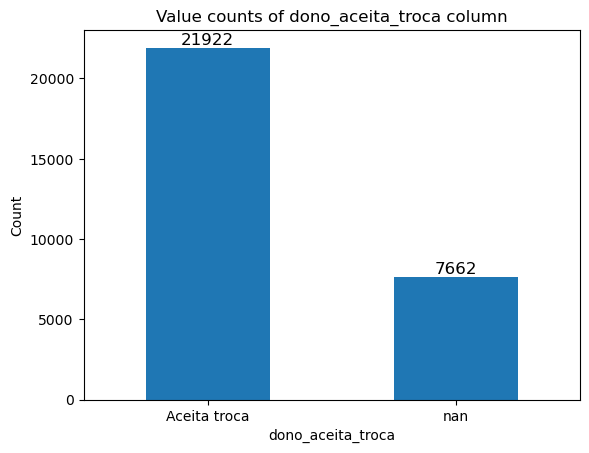

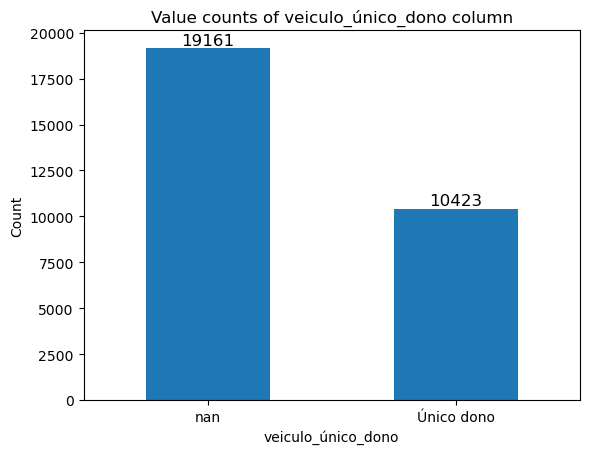

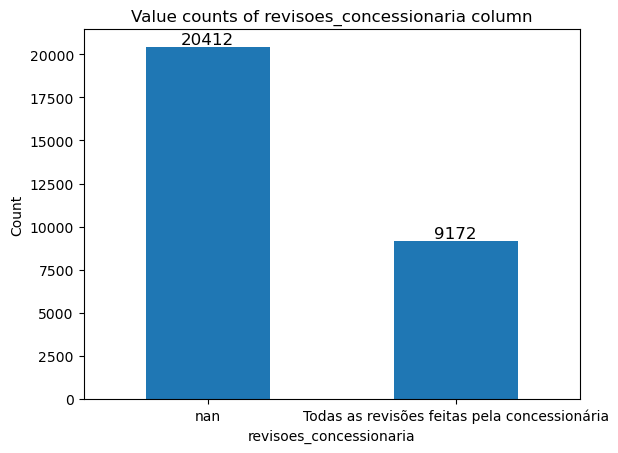

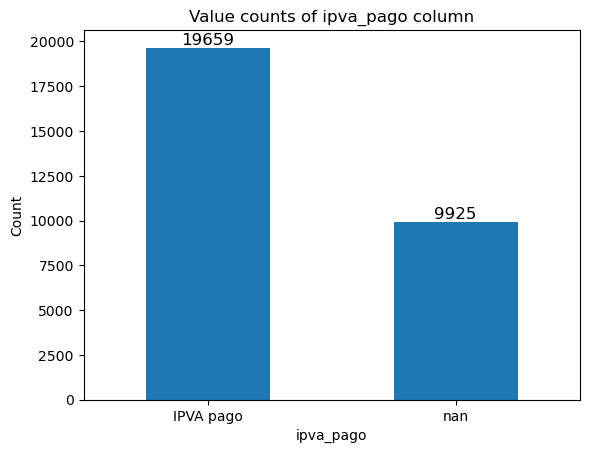

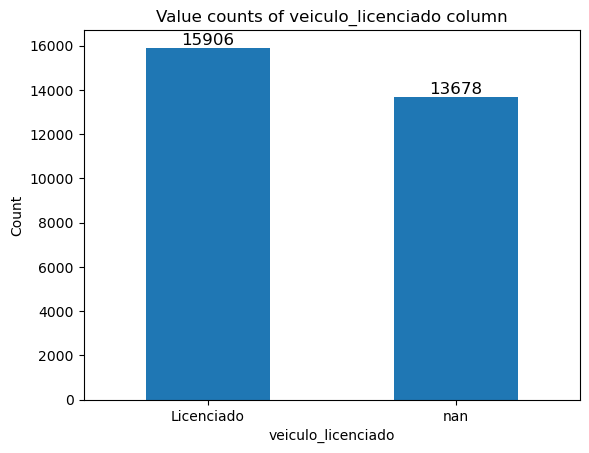

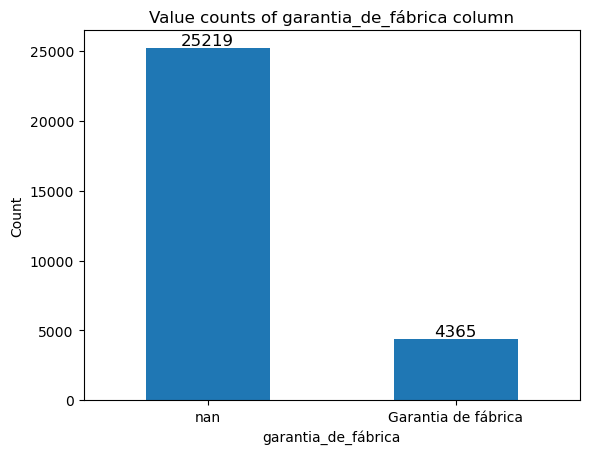

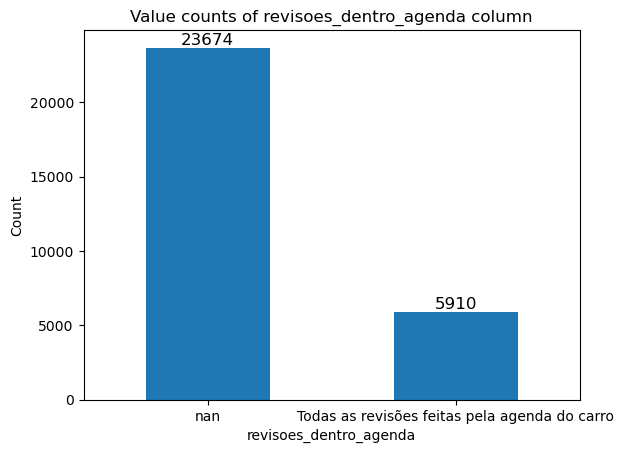

In [11]:
for col in booleans:

    coluna = df[col].value_counts(dropna=False)
    ax = coluna.plot(kind="bar")
    plt.title('Value counts of '+col+' column')
    plt.xlabel(col)
    plt.xticks(rotation=0)
    plt.ylabel('Count')
    for i, v in enumerate(coluna):
        ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)
    plt.show()

In [12]:
#Obtendo informação do tipo de combustivel
versao = df['versao']

df['combustivel'] = None

flex=0
gasolina=0
diesel = 0
hibrido = 0
eletrico = 0
outros = 0

for i,ver in enumerate(versao):
    if "FLEX" in ver:
        flex+=1
        df.at[i, 'combustivel'] = 'FLEX'
        continue
    if "GASOLINA" in ver:
        gasolina+=1
        df.at[i, 'combustivel'] = 'GASOLINA'
        continue
    if "DIESEL" in ver:
        diesel+=1
        df.at[i, 'combustivel'] = 'DIESEL'
        continue
    if "HÍBRIDO" in ver or "HYBRID" in ver:
        hibrido+=1
        df.at[i, 'combustivel'] = 'HIBRIDO'
        continue
    if "ELÉTRICO" in ver:
        eletrico+=1
        df.at[i, 'combustivel'] = 'ELETRICO'
        continue
    print(ver)
    df.at[i, 'combustivel'] = 'OUTROS'
    outros+=1

print(flex)
print(gasolina)
print(diesel)
print(hibrido)
print(eletrico)
print(outros)


1.0 200 TSI COMFORTLINE AUTOMÁTICO
1.0 200 TSI HIGHLINE AUTOMÁTICO
1.0 200 TSI HIGHLINE AUTOMÁTICO
1.0 200 TSI COMFORTLINE AUTOMÁTICO
1.0 200 TSI COMFORTLINE AUTOMÁTICO
1.0 200 TSI COMFORTLINE AUTOMÁTICO
1.0 200 TSI COMFORTLINE AUTOMÁTICO
1.4 250 TSI GTS AUTOMÁTICO
1.0 200 TSI COMFORTLINE AUTOMÁTICO
1.0 200 TSI COMFORTLINE AUTOMÁTICO
1.0 200 TSI COMFORTLINE AUTOMÁTICO
1.0 200 TSI COMFORTLINE AUTOMÁTICO
1.0 200 TSI COMFORTLINE AUTOMÁTICO
1.0 200 TSI COMFORTLINE AUTOMÁTICO
1.0 200 TSI HIGHLINE AUTOMÁTICO
1.0 200 TSI HIGHLINE AUTOMÁTICO
1.0 200 TSI COMFORTLINE AUTOMÁTICO
1.0 200 TSI COMFORTLINE AUTOMÁTICO
1.4 250 TSI GTS AUTOMÁTICO
1.0 200 TSI HIGHLINE AUTOMÁTICO
1.0 200 TSI HIGHLINE AUTOMÁTICO
1.0 200 TSI COMFORTLINE AUTOMÁTICO
1.0 200 TSI HIGHLINE AUTOMÁTICO
1.0 200 TSI COMFORTLINE AUTOMÁTICO
1.0 200 TSI HIGHLINE AUTOMÁTICO
1.4 250 TSI GTS AUTOMÁTICO
1.0 200 TSI HIGHLINE AUTOMÁTICO
1.0 200 TSI COMFORTLINE AUTOMÁTICO
1.0 200 TSI COMFORTLINE AUTOMÁTICO
1.0 200 TSI COMFORTLINE AUTOMÁTICO
1

In [13]:
# sns.pairplot(df)

In [14]:
tipo = df['tipo_vendedor']
anunciante = df['anunciante']

ok = 0


for t, a in zip(tipo, anunciante):
    if t=='PF' and a=='Pessoa Física':
#         ok+=1
        continue
    if (t=='PJ' and a=='Loja') or(t=='PJ' and a=='Concessionária'):
#         ok+=1
        continue
    print("Tipo:", t, "- Anunciante:", a)
    ok+=1


print(100*ok/len(tipo))
    

Tipo: PJ - Anunciante: Pessoa Física
Tipo: PF - Anunciante: Loja
Tipo: PF - Anunciante: Loja
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Pessoa Física
Tipo: PJ - Anunciante: Acessórios e serviços para autos
Tipo: PF - Anunciante: Loja
Tipo: PJ 

In [15]:
primeira_linha = df.iloc[0]

# Convertendo colunas float para int

def float_to_int(value):
    return int(value) if not pd.isna(value) else int(0)

floats_ints = ['num_fotos','ano_modelo','hodometro']

for col in floats_ints:
    df[col] = df[col].apply(float_to_int)

# Percorrendo a primeira linha e imprimindo valor e tipo de cada variável
for coluna, valor in primeira_linha.iteritems():
    print(f'Coluna: {coluna}, Valor: {valor}, Tipo: {type(valor)}')

Coluna: id, Valor: 300716223898539419613863097469899222392, Tipo: <class 'str'>
Coluna: num_fotos, Valor: 8.0, Tipo: <class 'numpy.float64'>
Coluna: marca, Valor: NISSAN, Tipo: <class 'str'>
Coluna: modelo, Valor: KICKS, Tipo: <class 'str'>
Coluna: versao, Valor: 1.6 16V FLEXSTART SL 4P XTRONIC, Tipo: <class 'str'>
Coluna: ano_de_fabricacao, Valor: 2017, Tipo: <class 'numpy.int64'>
Coluna: ano_modelo, Valor: 2017.0, Tipo: <class 'numpy.float64'>
Coluna: hodometro, Valor: 67772.0, Tipo: <class 'numpy.float64'>
Coluna: cambio, Valor: CVT, Tipo: <class 'str'>
Coluna: num_portas, Valor: 4, Tipo: <class 'numpy.int64'>
Coluna: tipo, Valor: Sedã, Tipo: <class 'str'>
Coluna: blindado, Valor: N, Tipo: <class 'str'>
Coluna: cor, Valor: Branco, Tipo: <class 'str'>
Coluna: tipo_vendedor, Valor: PF, Tipo: <class 'str'>
Coluna: cidade_vendedor, Valor: Rio de Janeiro, Tipo: <class 'str'>
Coluna: estado_vendedor, Valor: São Paulo (SP), Tipo: <class 'str'>
Coluna: anunciante, Valor: Pessoa Física, Tipo

C:\Users\ander\AppData\Local\Temp\ipykernel_29296\2196750561.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for coluna, valor in primeira_linha.iteritems():


In [16]:
# Convertendo as colunas boolean
# df['blindado']
def bool_blindado(value):
    if value=='S':
        return True
    if value=='N':
        return False
    
df['blindado'] = df['blindado'].apply(bool_blindado)

def bool_dono_aceita_troca(value):
    if isinstance(value, str) and value == 'Aceita troca':
        return True
    return False

df['dono_aceita_troca'] = df['dono_aceita_troca'].apply(bool_dono_aceita_troca)

def bool_veiculo_unico_dono(value):
    if isinstance(value, str) and value == 'Único dono':
        return True
    return False
    
df['veiculo_único_dono'] = df['veiculo_único_dono'].apply(bool_veiculo_unico_dono)

def bool_revisoes_concessionaria(value):
    if isinstance(value, str) and value == 'Todas as revisões feitas pela concessionária':
        return True
    return False

df['revisoes_concessionaria'] = df['revisoes_concessionaria'].apply(bool_revisoes_concessionaria)

def bool_ipva_pago(value):
    if isinstance(value, str) and value == 'IPVA pago':
        return True
    return False

df['ipva_pago'] = df['ipva_pago'].apply(bool_ipva_pago)

def bool_veiculo_licenciado(value):
    if isinstance(value, str) and value == 'Licenciado':
        return True
    return False

df['veiculo_licenciado'] = df['veiculo_licenciado'].apply(bool_veiculo_licenciado)

def bool_garantia_de_fabrica(value):
    if isinstance(value, str) and value == 'Garantia de fábrica':
        return True
    return False

df['garantia_de_fábrica'] = df['garantia_de_fábrica'].apply(bool_garantia_de_fabrica)

def bool_revisoes_dentro_agenda(value):
    if isinstance(value, str) and value == 'Todas as revisões feitas pela agenda do carro':
        return True
    return False

df['revisoes_dentro_agenda'] = df['revisoes_dentro_agenda'].apply(bool_revisoes_dentro_agenda)

df.info()
primeira_linha = df.iloc[0]
for coluna, valor in primeira_linha.iteritems():
    print(f'Coluna: {coluna}, Valor: {valor}, Tipo: {type(valor)}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29584 non-null  int64  
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  int64  
 7   hodometro                29584 non-null  int64  
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  bool   
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

C:\Users\ander\AppData\Local\Temp\ipykernel_29296\4120865437.py:62: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for coluna, valor in primeira_linha.iteritems():


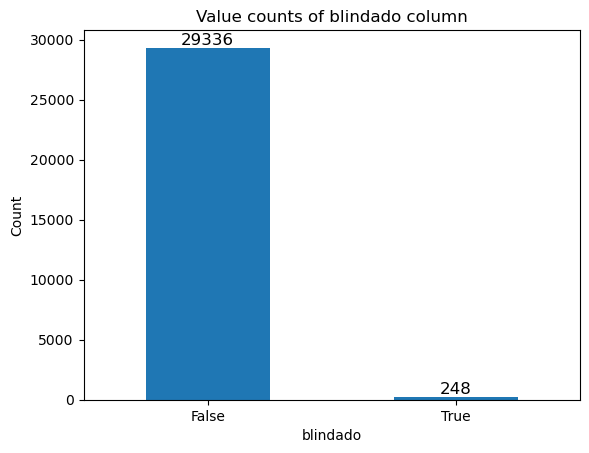

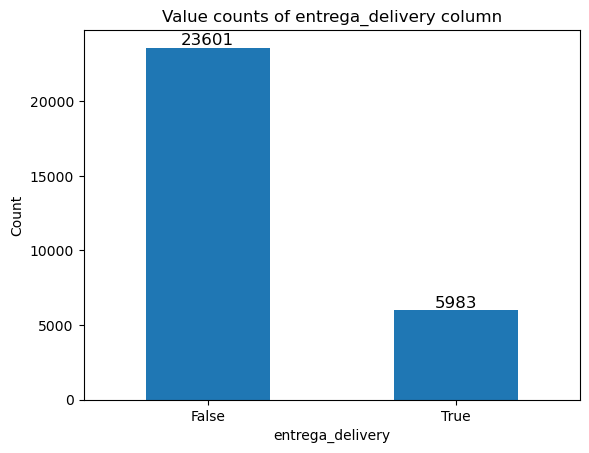

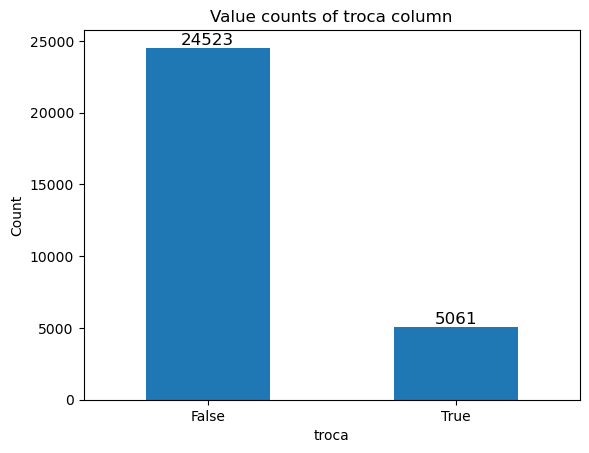

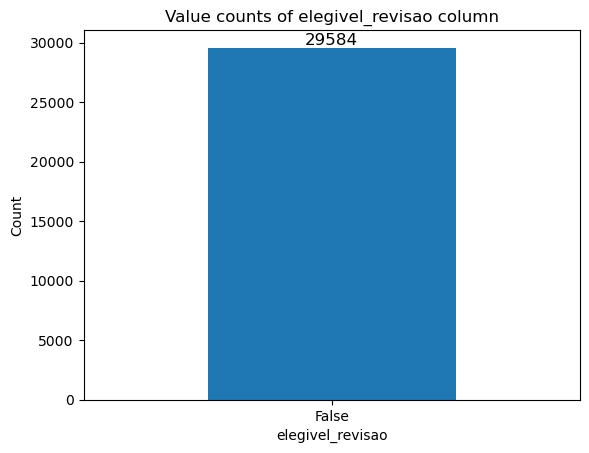

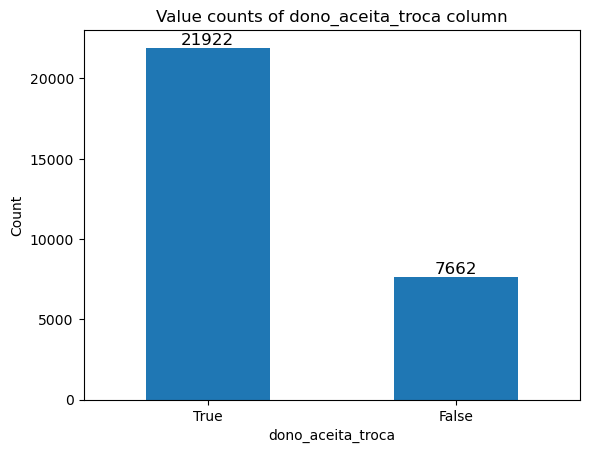

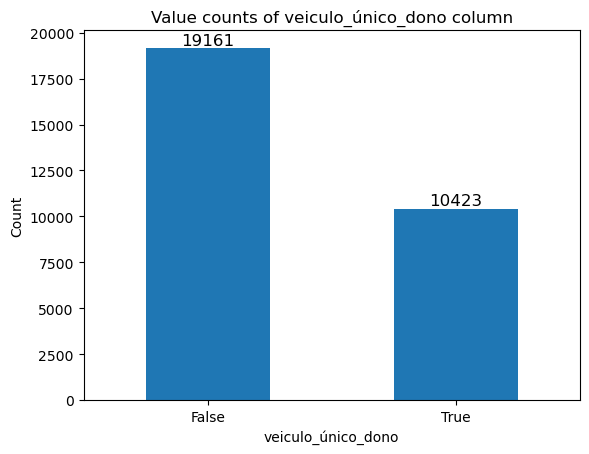

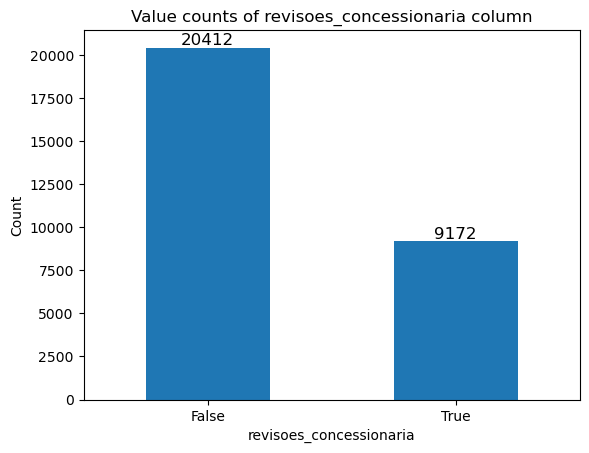

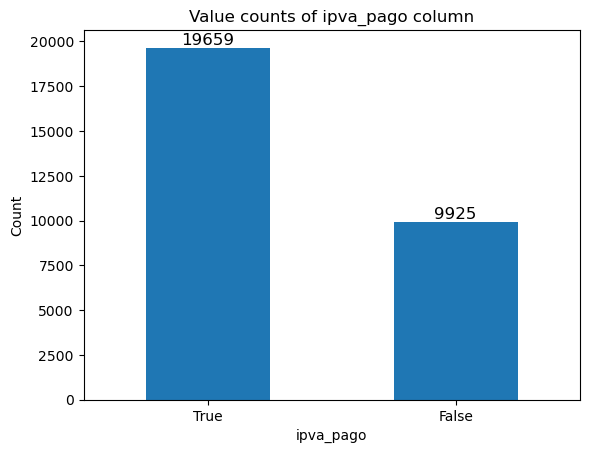

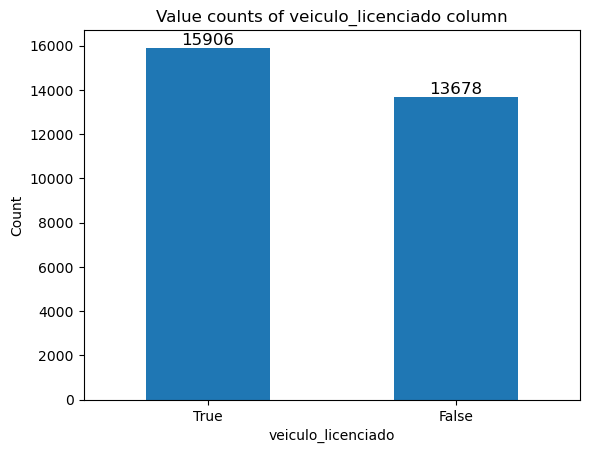

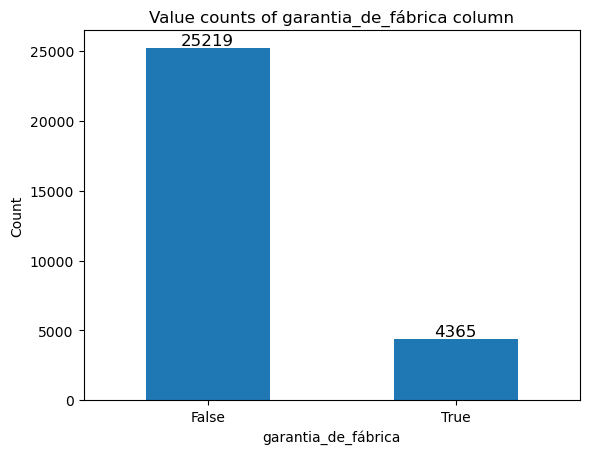

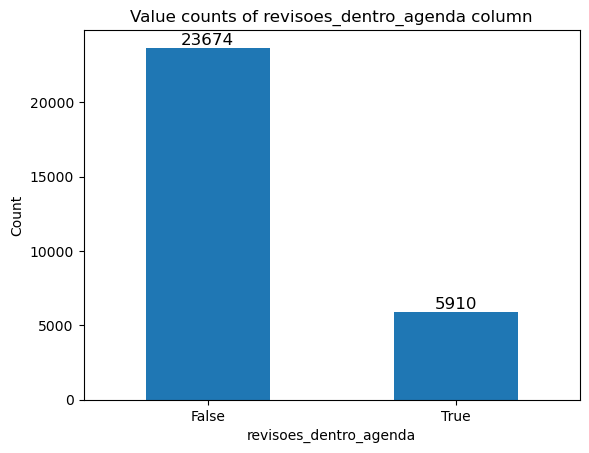

In [17]:
for col in booleans:

    coluna = df[col].value_counts(dropna=False)
    ax = coluna.plot(kind="bar")
    plt.title('Value counts of '+col+' column')
    plt.xlabel(col)
    plt.xticks(rotation=0)
    plt.ylabel('Count')
    for i, v in enumerate(coluna):
        ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)
    plt.show()

In [18]:
del df['versao']
del df['anunciante']
del df['elegivel_revisao']
del df['veiculo_alienado']

preco_coluna = df['preco']
del df['preco']
df['preco'] = preco_coluna

df

,id,num_fotos,marca,modelo,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,...,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,combustivel,preco
0,300716223898539419613863097469899222392,8,NISSAN,KICKS,2017,2017,67772,CVT,4,Sedã,...,False,False,False,True,True,True,False,False,FLEX,74732.590084
1,279639842134129588306469566150288644214,8,JEEP,COMPASS,2017,2017,62979,Automática,4,Sedã,...,False,True,False,False,True,False,False,False,FLEX,81965.332634
2,56414460810621048900295678236538171981,16,KIA,SORENTO,2018,2019,44070,Automática,4,Sedã,...,False,True,False,False,False,False,False,False,GASOLINA,162824.814472
3,56862509826849933428086372390159405545,14,VOLKSWAGEN,AMAROK,2013,2015,85357,Automática,4,Picape,...,True,True,False,False,True,True,False,False,DIESEL,123681.358857
4,338980975753200343894519909855598027197,8,SSANGYONG,KORANDO,2013,2015,71491,Automática,4,Utilitário esportivo,...,False,False,False,True,False,False,True,True,DIESEL,82419.763891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,40985083650499509711752444068313401704,8,TOYOTA,HILUX,2021,2021,8150,Automática,4,Picape,...,False,True,True,False,True,True,True,False,DIESEL,403015.289616
29580,164663177589009976281210123914772747797,8,VOLKSWAGEN,POLO,2020,2020,17987,Automática,4,Picape,...,False,False,True,True,True,True,True,False,OUTROS,88978.080497
29581,170866287186047465472146212778882034162,8,TOYOTA,HILUX,2019,2019,44742,Automática,4,Picape,...,False,True,False,False,False,False,False,False,DIESEL,218807.648664
29582,208909739337040262669325459666578363437,8,PEUGEOT,2008,2021,2022,35376,Automática,4,Sedã,...,False,True,True,False,True,True,False,False,FLEX,68495.990693


C:\Users\ander\AppData\Local\Temp\ipykernel_29296\2027434619.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['preco'])


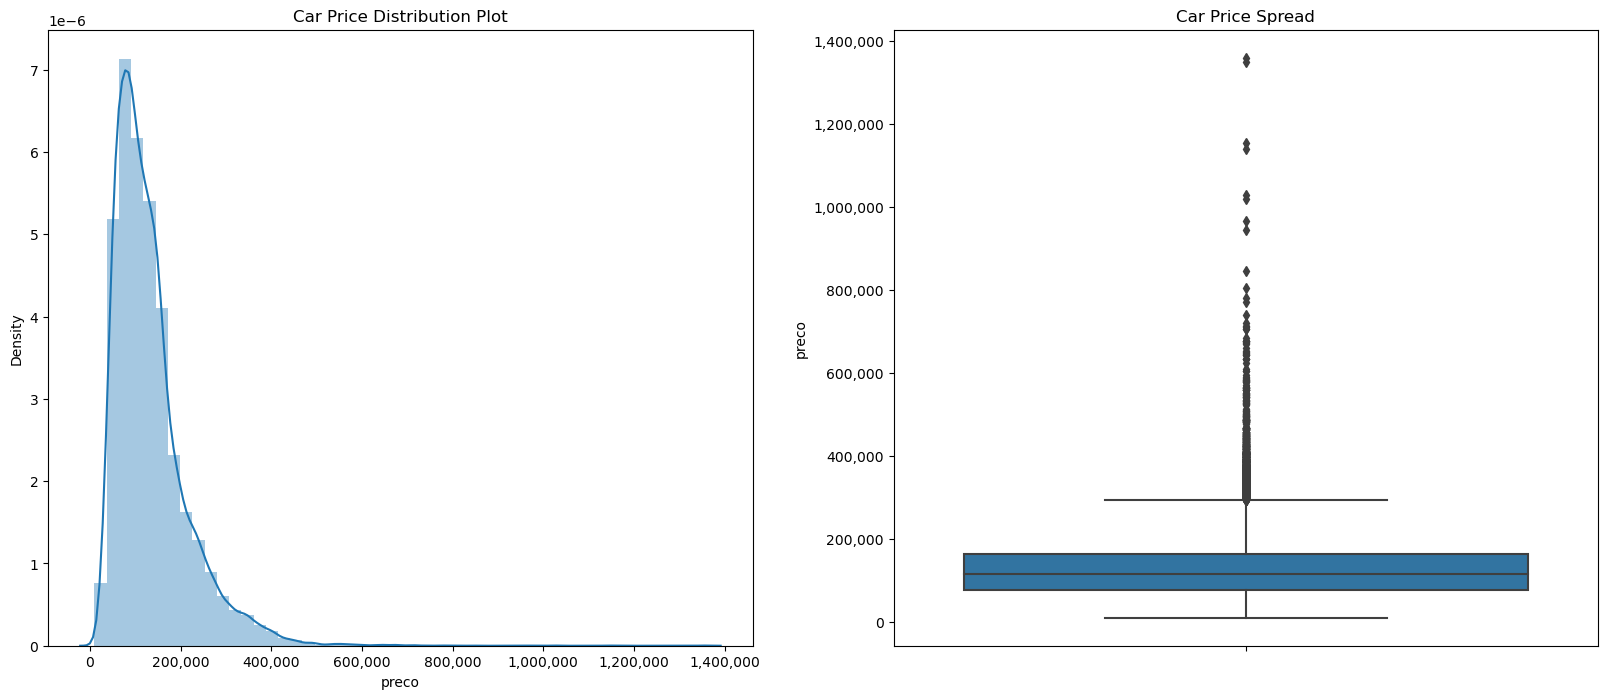

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df['preco'])
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,}".format(int(y))))

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df['preco'])
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,}".format(int(y))))


plt.show()

In [20]:
booleans = ['blindado','entrega_delivery','troca','dono_aceita_troca','veiculo_único_dono','revisoes_concessionaria','ipva_pago','veiculo_licenciado','garantia_de_fábrica','revisoes_dentro_agenda']
numericas = ['num_fotos','ano_de_fabricacao','ano_modelo','hodometro','num_portas']
strings = ['marca','modelo','cambio','tipo','cor','tipo_vendedor','cidade_vendedor','estado_vendedor','combustivel']

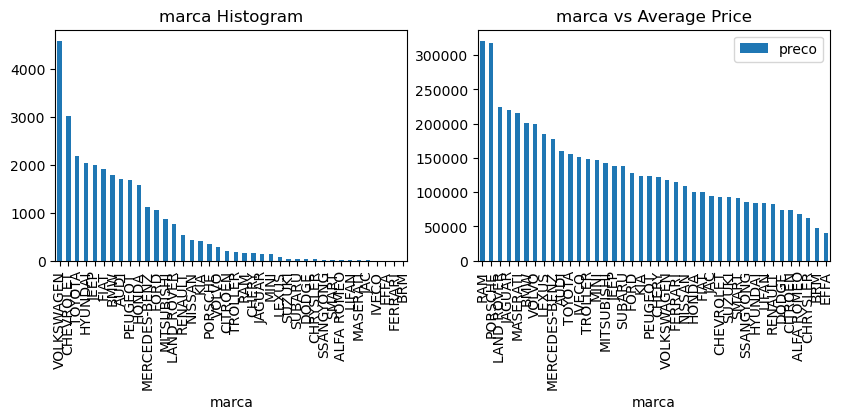

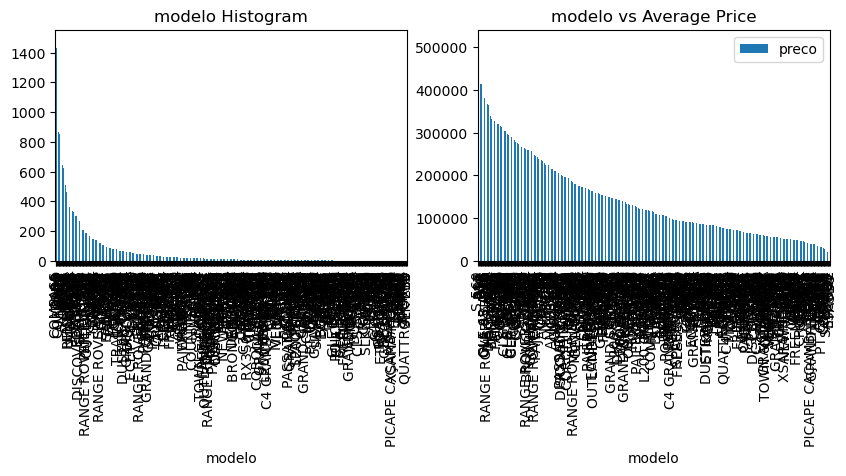

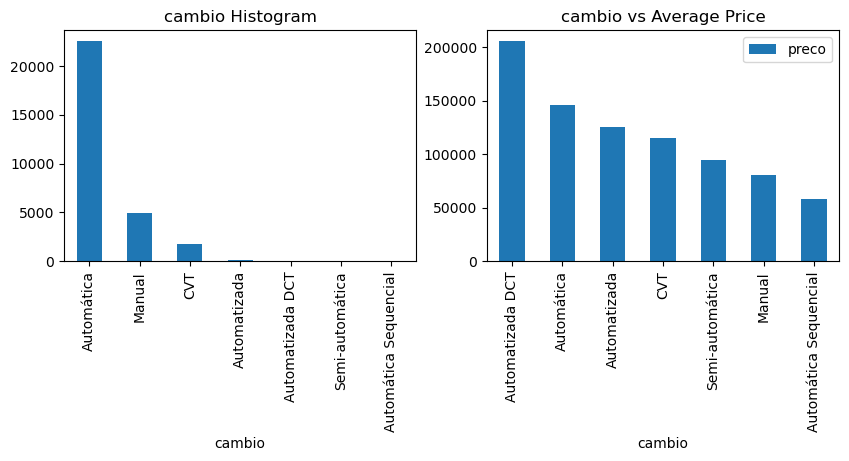

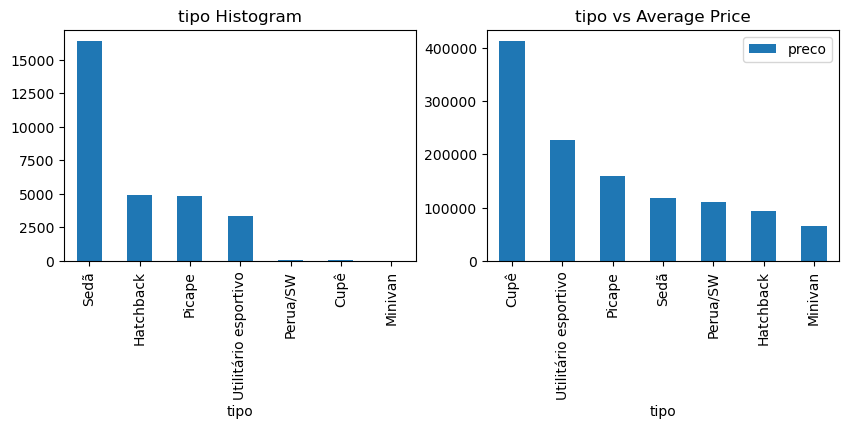

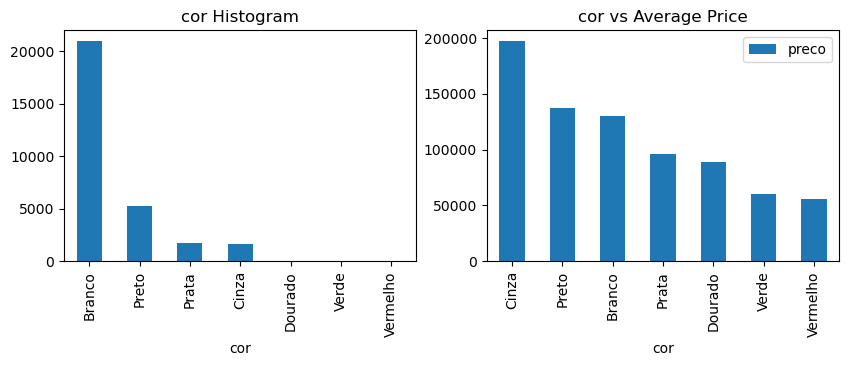

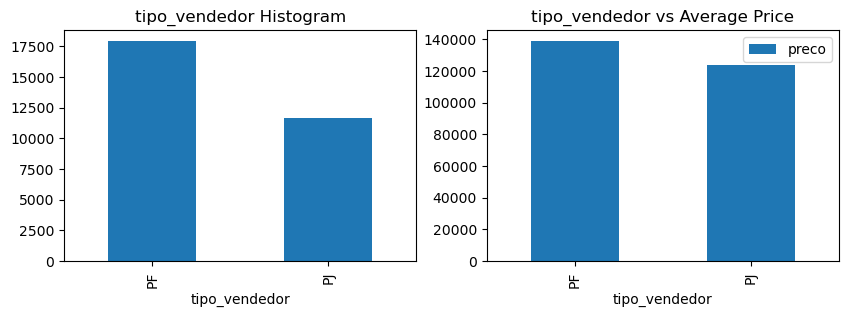

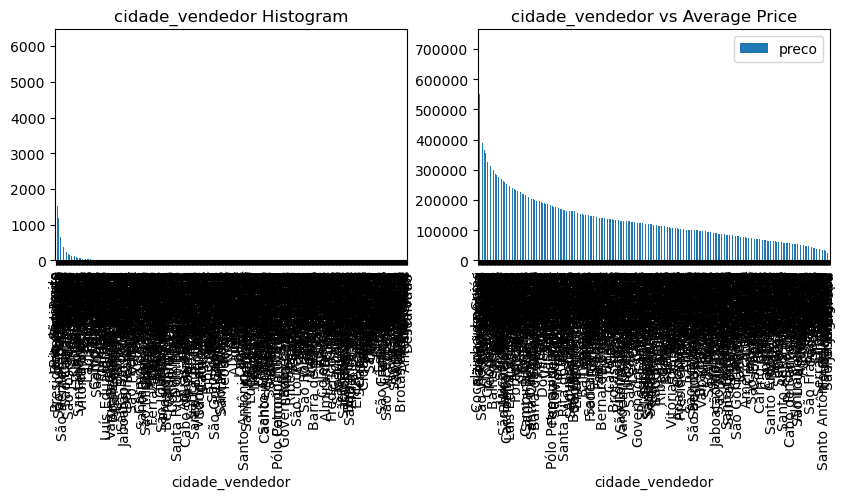

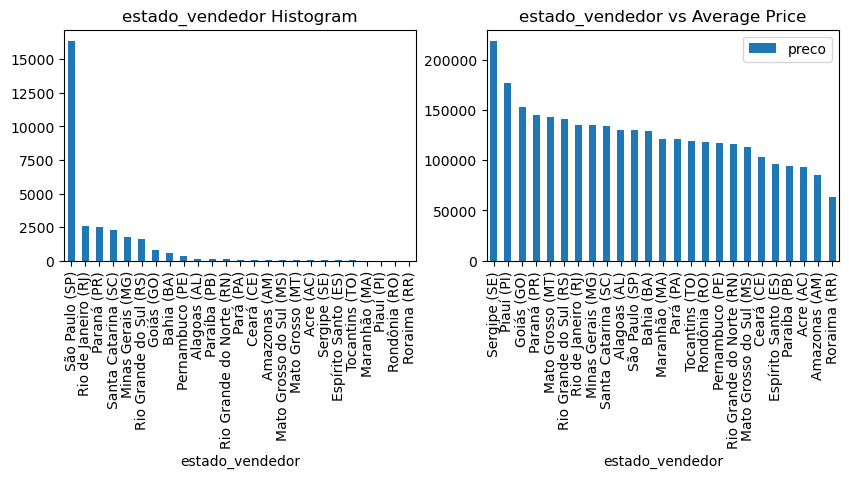

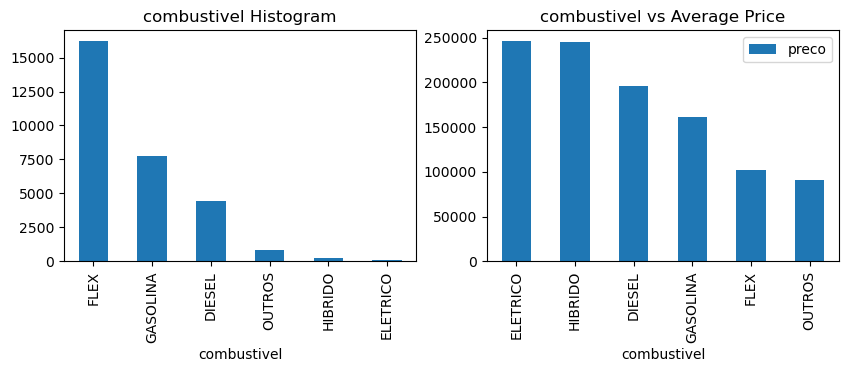

In [21]:
def price_comp(a):
    fig = plt.figure(figsize=(10,3))
    s1=fig.add_subplot(1,2,1)
    s2=fig.add_subplot(1,2,2)


    count=df[a].value_counts()
    count.plot(kind='bar',ax=s1)
    s1.set_title(a+' Histogram')
    s1.set_xlabel(a)


    preco = pd.DataFrame(df.groupby([a])['preco'].mean().sort_values(ascending = False))
    preco.plot(kind='bar',ax=s2)
    plt.title(a+' vs Average Price')
    plt.show()
    
for col in strings:
    price_comp(col)

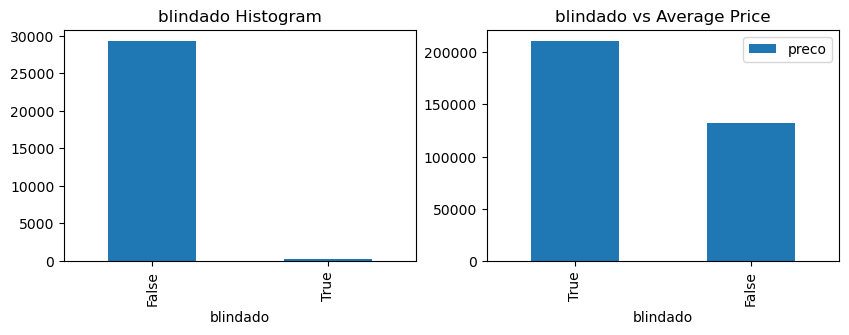

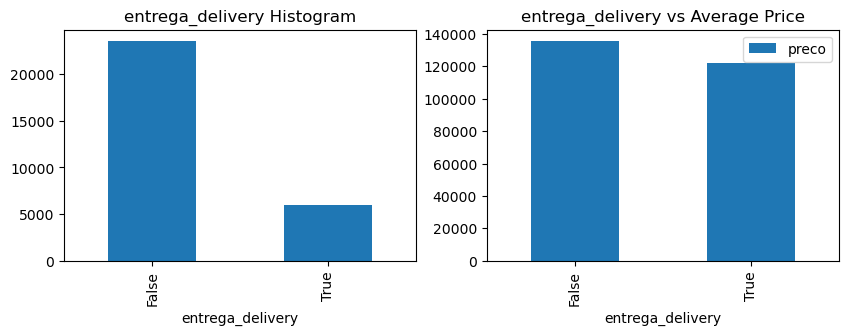

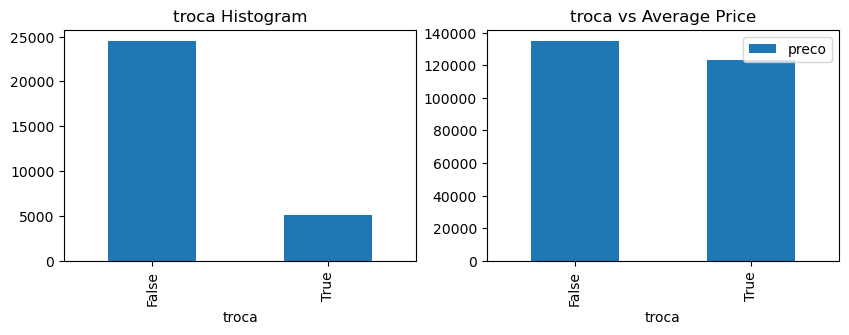

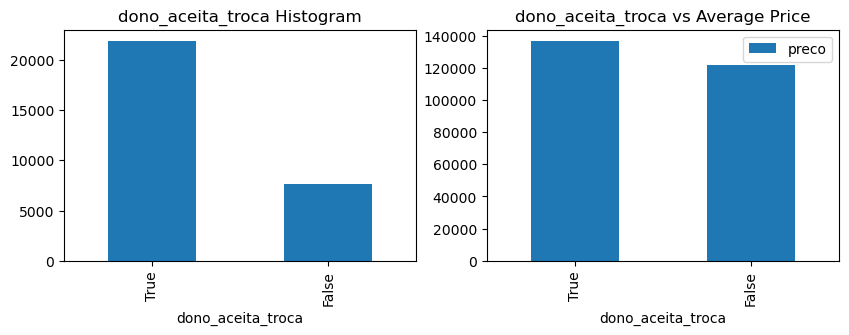

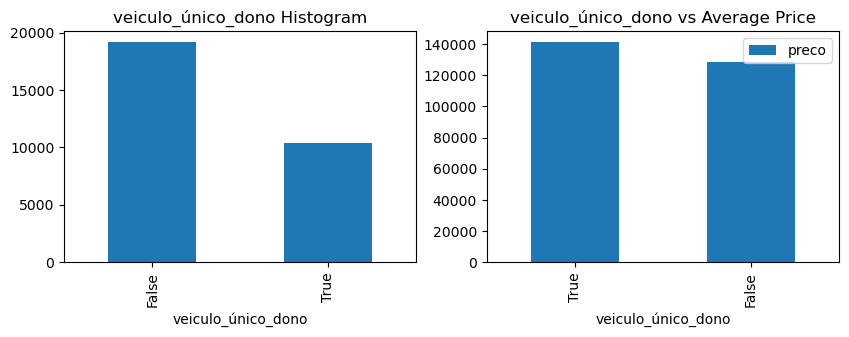

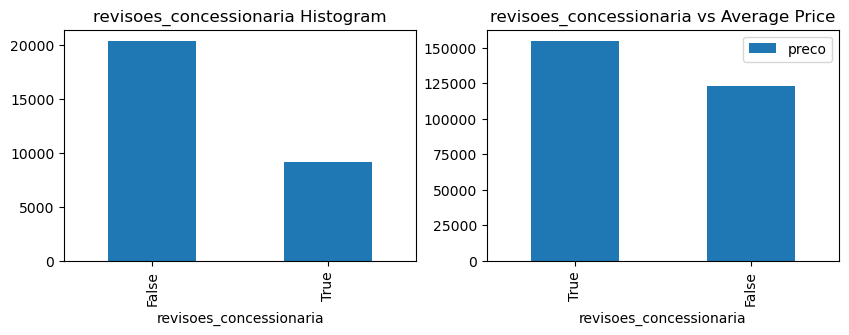

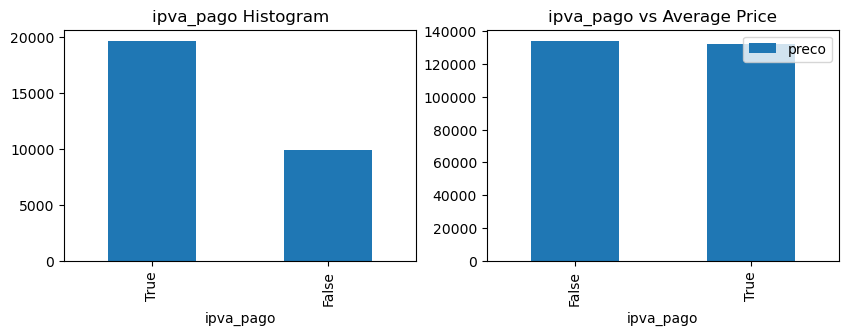

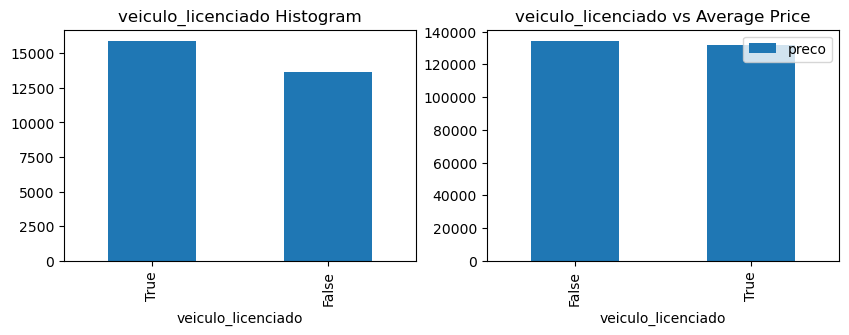

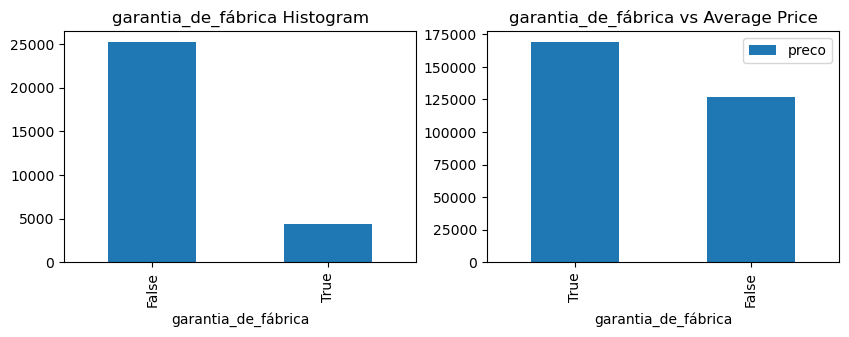

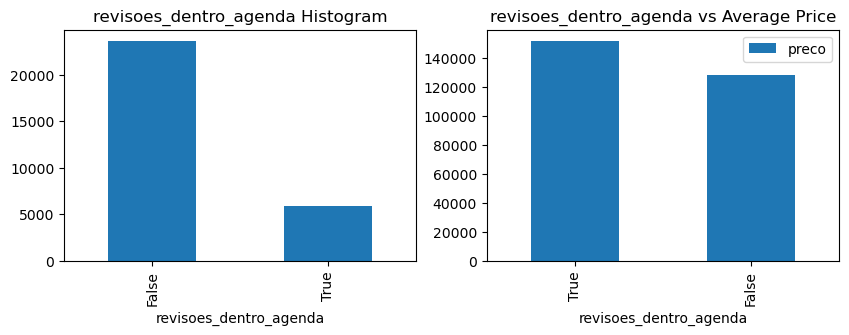

In [22]:
    
for col in booleans:
    price_comp(col)

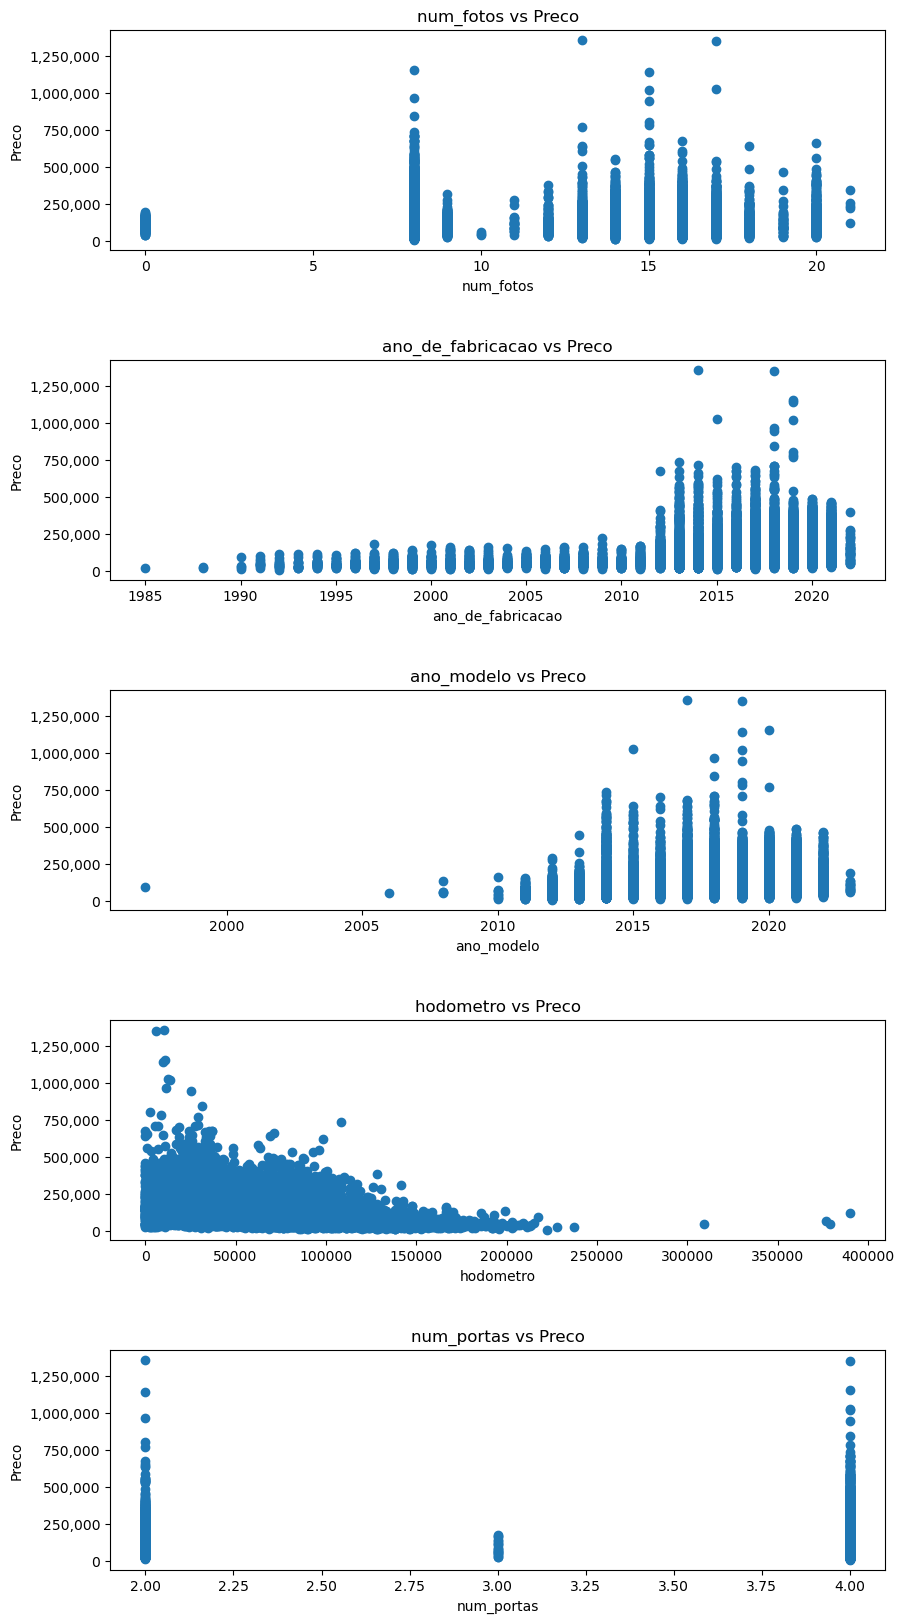

In [23]:
def scatter(x,fig):
    plt.subplot(5,1,fig)
    plt.scatter(df[x],df['preco'])
    plt.title(x+' vs Preco')
    plt.ylabel('Preco')
    plt.xlabel(x)
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.figure(figsize=(10,20))

for i, col in enumerate(numericas):
    scatter(col,i+1)

plt.subplots_adjust(hspace=0.5)


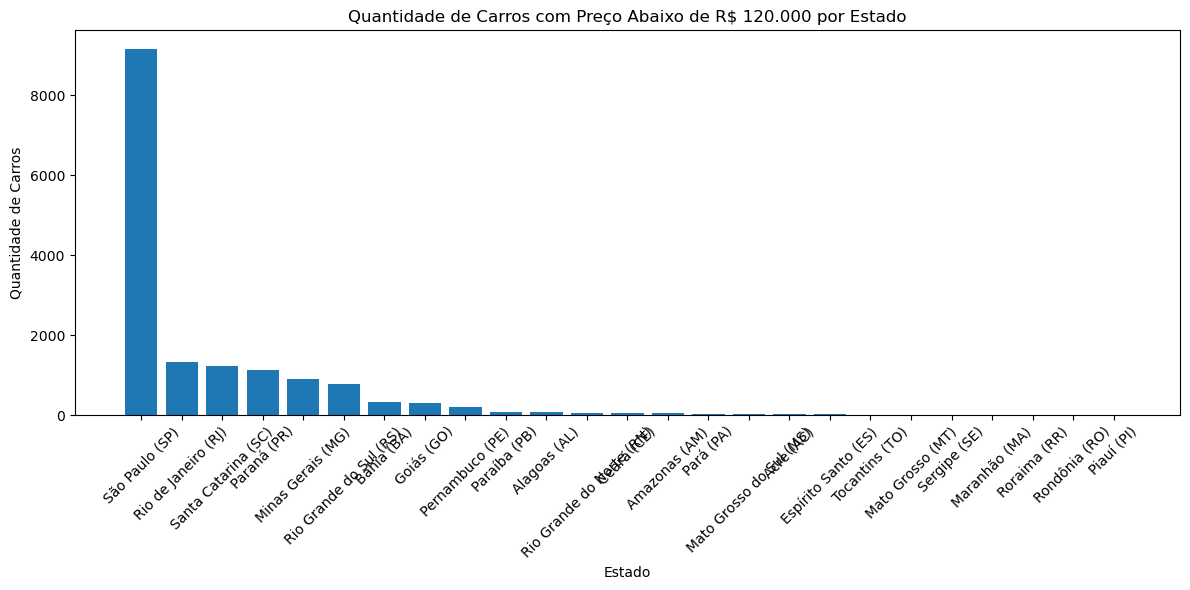

In [24]:
# Questões de negócio
#Foi considerado como popular carros abaixo de 120.000 reais.
carros_populares_abaixo_120000 = df[df['preco'] < 120000]


quantidade_por_estado = carros_populares_abaixo_120000['estado_vendedor'].value_counts().reset_index()
quantidade_por_estado.columns = ['estado_vendedor', 'quantidade']

quantidade_por_estado = quantidade_por_estado.sort_values(by='quantidade', ascending=False)

# Plotar o gráfico de barras com a quantidade de carros em cada estado
plt.figure(figsize=(12, 6))
plt.bar(quantidade_por_estado['estado_vendedor'], quantidade_por_estado['quantidade'])
plt.xlabel('Estado')
plt.ylabel('Quantidade de Carros')
plt.title('Quantidade de Carros com Preço Abaixo de R$ 120.000 por Estado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

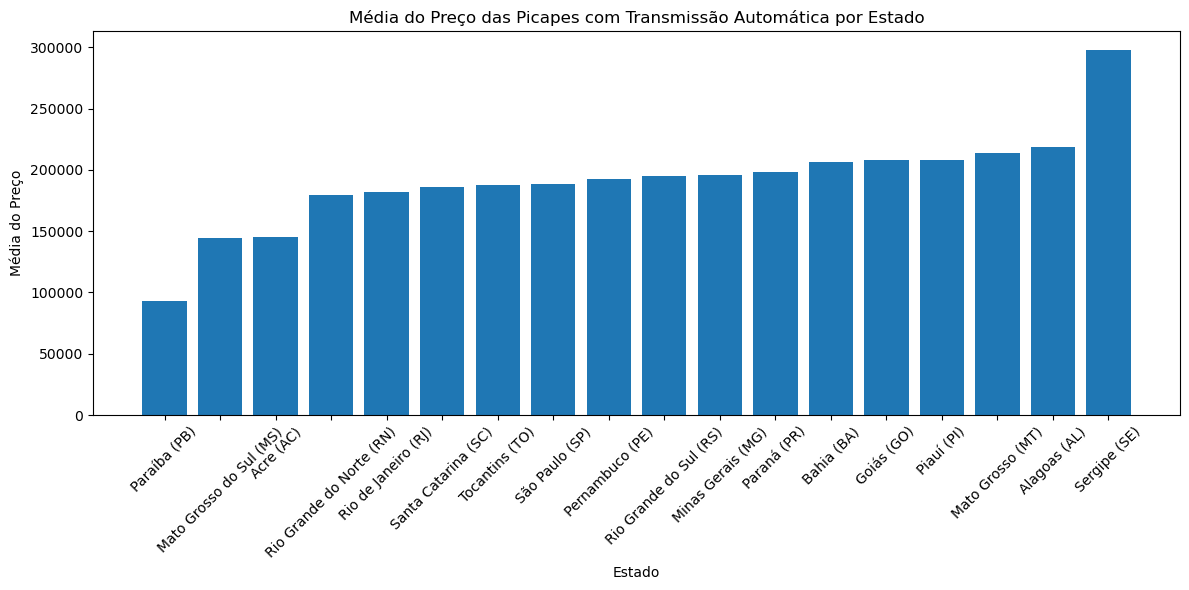

In [25]:
# Filtrar o DataFrame para obter apenas as picapes com transmissão automática
picapes_automaticas = df[(df['tipo'] == 'Picape') & (df['cambio'] == 'Automática')]

# Agrupar por estado e calcular a média dos preços para cada estado
media_preco_por_estado = picapes_automaticas.groupby('estado_vendedor')['preco'].mean().reset_index()

# Ordenar os estados pela média dos preços em ordem decrescente
media_preco_por_estado = media_preco_por_estado.sort_values(by='preco', ascending=True)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(media_preco_por_estado['estado_vendedor'], media_preco_por_estado['preco'])
plt.xlabel('Estado')
plt.ylabel('Média do Preço')
plt.title('Média do Preço das Picapes com Transmissão Automática por Estado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

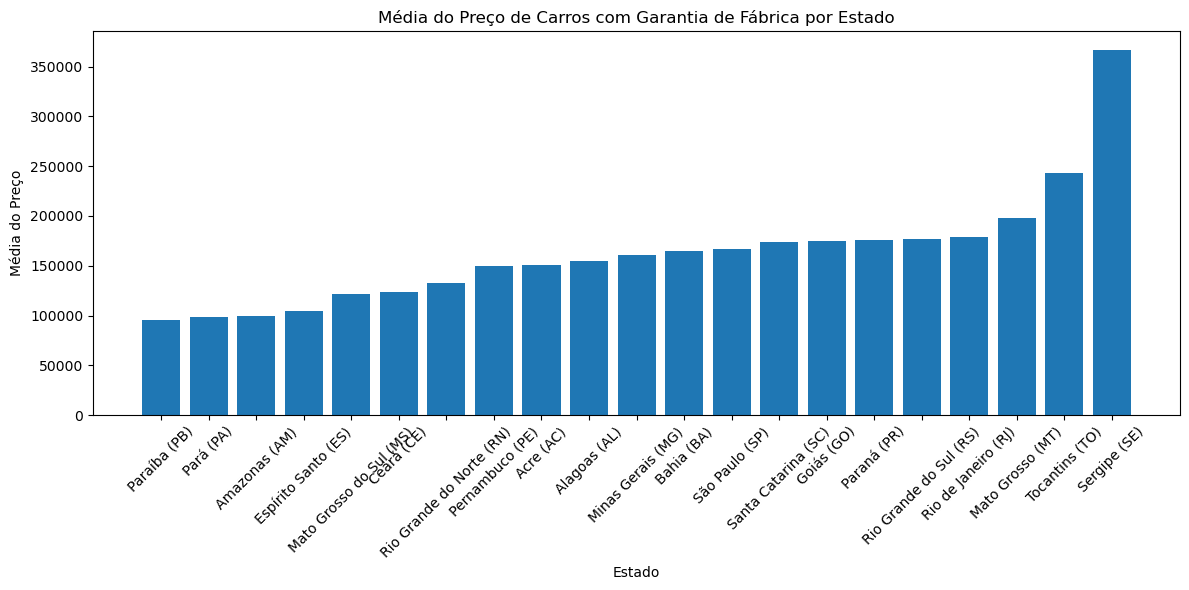

O melhor estado para se comprar carros com garantia de fábrica é Paraíba (PB) com média de preço de R$95762.75.


In [26]:
carros_garantia = df[df['garantia_de_fábrica'] == True]


media_preco_por_estado = carros_garantia.groupby('estado_vendedor')['preco'].mean().reset_index()

media_preco_por_estado = media_preco_por_estado.sort_values(by='preco', ascending=True)

# Obter o melhor estado
melhor_estado = media_preco_por_estado.iloc[0]['estado_vendedor']
melhor_media_preco = media_preco_por_estado.iloc[0]['preco']


plt.figure(figsize=(12, 6))
plt.bar(media_preco_por_estado['estado_vendedor'], media_preco_por_estado['preco'])
plt.xlabel('Estado')
plt.ylabel('Média do Preço')
plt.title('Média do Preço de Carros com Garantia de Fábrica por Estado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exibir o melhor estado e a respectiva métrica de desempenho
print(f'O melhor estado para se comprar carros com garantia de fábrica é {melhor_estado} com média de preço de R${melhor_media_preco:.2f}.')

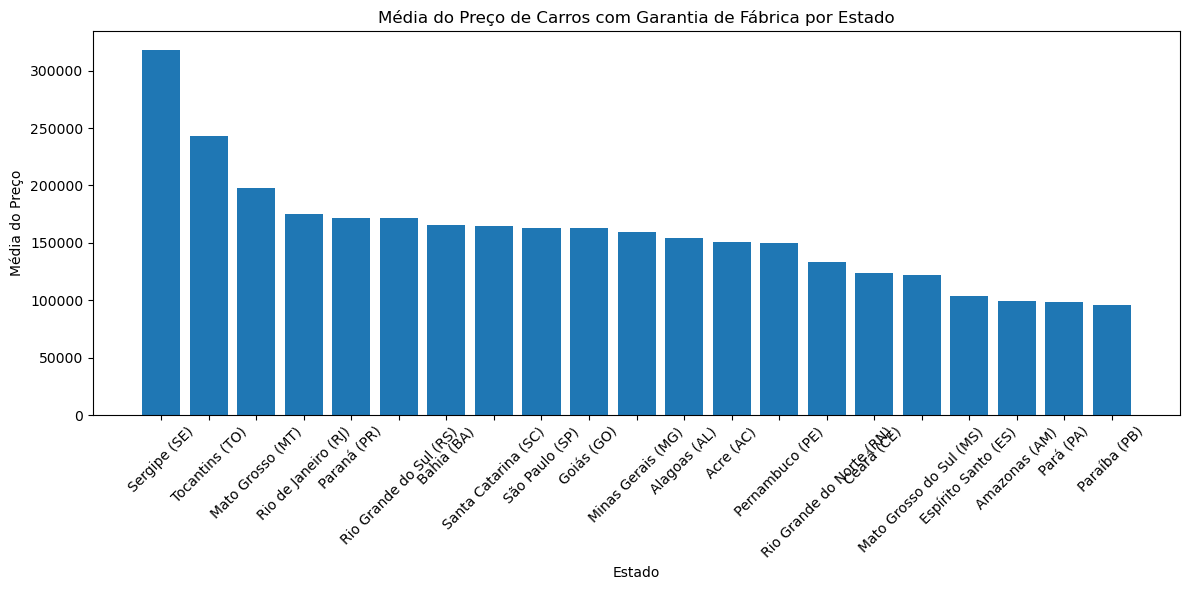

O melhor estado para se comprar carros com garantia de fábrica é Sergipe (SE) com média de preço de R$318314.44.


In [27]:
carros_garantia = df[df['garantia_de_fábrica'] == True]

# Calcular o IQR para a coluna 'preco'
Q1 = carros_garantia['preco'].quantile(0.25)
Q3 = carros_garantia['preco'].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover os outliers com base no IQR
carros_garantia_sem_outliers = carros_garantia[(carros_garantia['preco'] >= limite_inferior) & (carros_garantia['preco'] <= limite_superior)]


media_preco_por_estado = carros_garantia_sem_outliers.groupby('estado_vendedor')['preco'].mean().reset_index()


media_preco_por_estado = media_preco_por_estado.sort_values(by='preco', ascending=False)


melhor_estado = media_preco_por_estado.iloc[0]['estado_vendedor']
melhor_media_preco = media_preco_por_estado.iloc[0]['preco']

plt.figure(figsize=(12, 6))
plt.bar(media_preco_por_estado['estado_vendedor'], media_preco_por_estado['preco'])
plt.xlabel('Estado')
plt.ylabel('Média do Preço')
plt.title('Média do Preço de Carros com Garantia de Fábrica por Estado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



print(f'O melhor estado para se comprar carros com garantia de fábrica é {melhor_estado} com média de preço de R${melhor_media_preco:.2f}.')

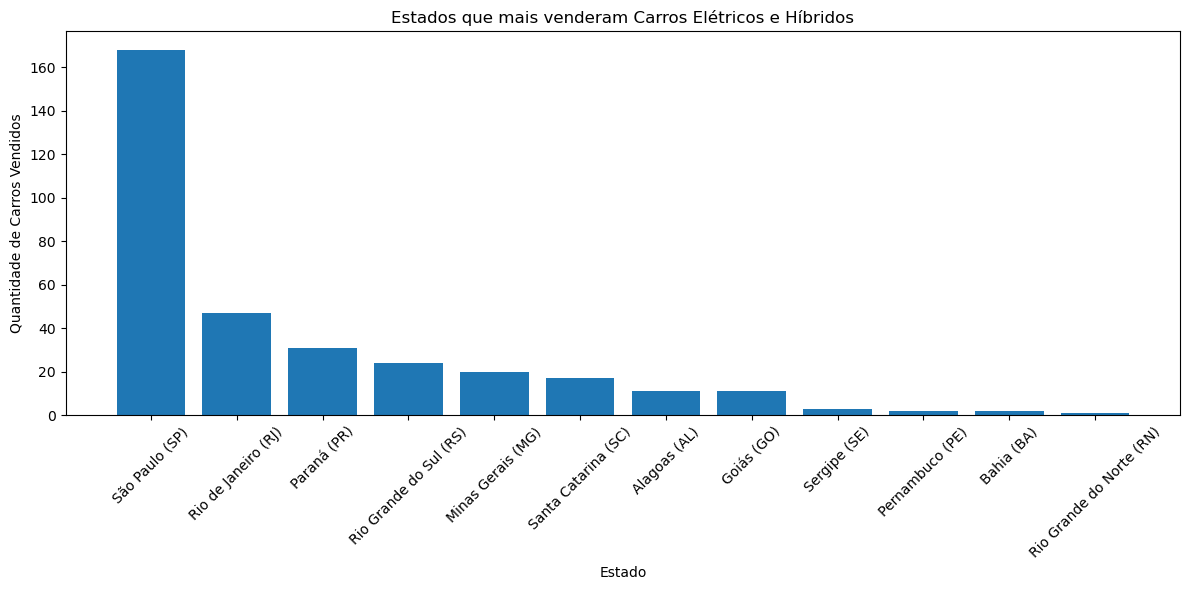

In [28]:

carros_eletricos_hibridos = df[df['combustivel'].isin(['ELETRICO', 'HIBRIDO'])]


quantidade_por_estado = carros_eletricos_hibridos['estado_vendedor'].value_counts().reset_index()
quantidade_por_estado.columns = ['estado_vendedor', 'quantidade']


quantidade_por_estado = quantidade_por_estado.sort_values(by='quantidade', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(quantidade_por_estado['estado_vendedor'], quantidade_por_estado['quantidade'])
plt.xlabel('Estado')
plt.ylabel('Quantidade de Carros Vendidos')
plt.title('Estados que mais venderam Carros Elétricos e Híbridos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



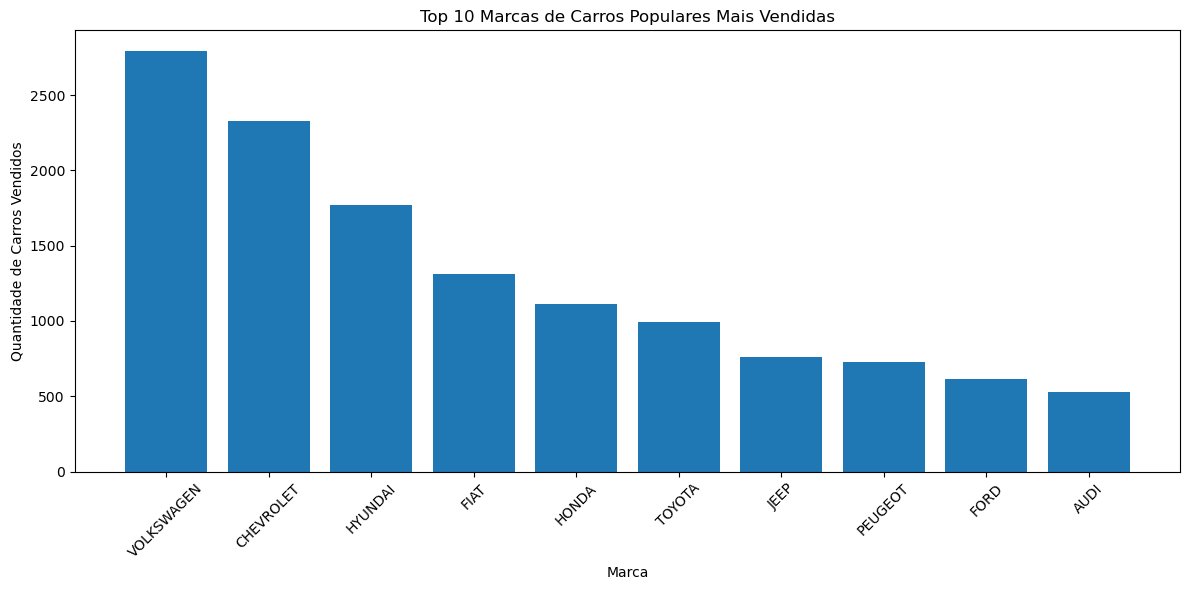

In [29]:
carros_populares = df[df['preco'] < 120000]

# Contar a quantidade de carros vendidos por marca
quantidade_por_marca = carros_populares['marca'].value_counts().reset_index()
quantidade_por_marca.columns = ['marca', 'quantidade']


quantidade_por_marca = quantidade_por_marca.sort_values(by='quantidade', ascending=False)

# Selecionar as 10 marcas mais vendidas
top_10_marcas = quantidade_por_marca.head(10)


plt.figure(figsize=(12, 6))
plt.bar(top_10_marcas['marca'], top_10_marcas['quantidade'])
plt.xlabel('Marca')
plt.ylabel('Quantidade de Carros Vendidos')
plt.title('Top 10 Marcas de Carros Populares Mais Vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


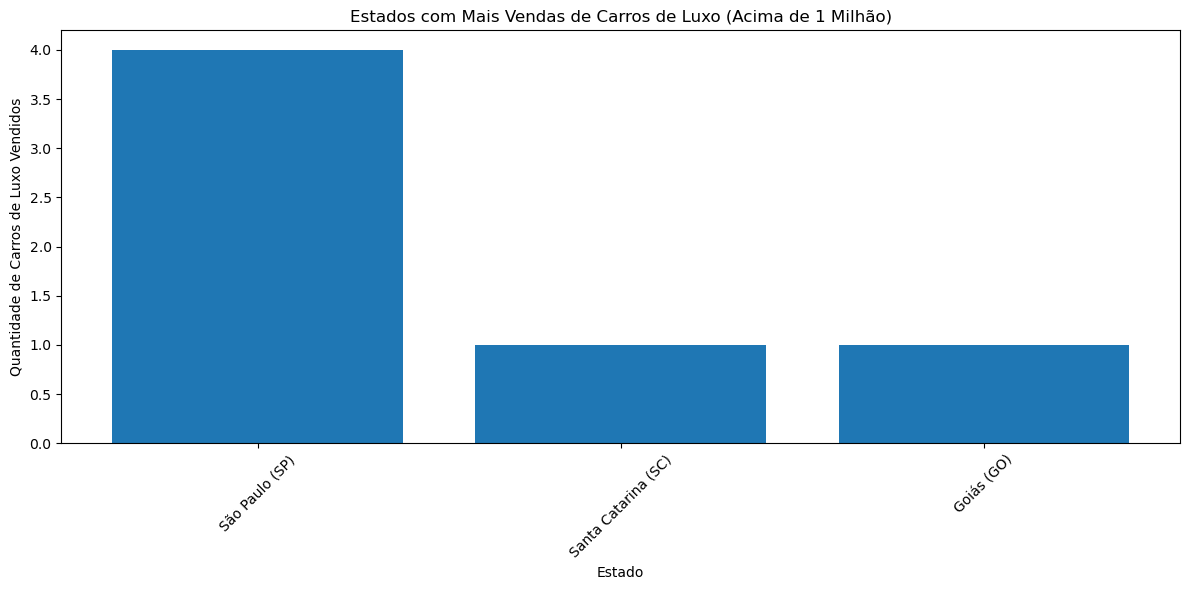

In [30]:

# Filtrar o DataFrame para obter apenas carros de luxo (valor acima de 1 milhão)
carros_de_luxo = df[df['preco'] > 1000000]

# Contar a quantidade de carros de luxo vendidos por estado
vendas_por_estado = carros_de_luxo['estado_vendedor'].value_counts().reset_index()
vendas_por_estado.columns = ['estado_vendedor', 'quantidade']


estado_mais_vendas = vendas_por_estado.iloc[0]['estado_vendedor']
quantidade_vendas_estado_mais_vendas = vendas_por_estado.iloc[0]['quantidade']


plt.figure(figsize=(12, 6))
plt.bar(vendas_por_estado['estado_vendedor'], vendas_por_estado['quantidade'])
plt.xlabel('Estado')
plt.ylabel('Quantidade de Carros de Luxo Vendidos')
plt.title('Estados com Mais Vendas de Carros de Luxo (Acima de 1 Milhão)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
#Preparand os dados para criar modelo de classificação
booleans = ['blindado','garantia_de_fábrica']
numericas = ['ano_de_fabricacao','hodometro','preco']
strings = ['cambio','tipo','combustivel','modelo','marca']



df_filtrado = df.filter(booleans + numericas + strings)
for col in booleans:
    df_filtrado[col] = df_filtrado[col].astype(int)

new_df = pd.get_dummies(columns=strings,data=df_filtrado)
new_df

,blindado,garantia_de_fábrica,ano_de_fabricacao,hodometro,preco,cambio_Automatizada,cambio_Automatizada DCT,cambio_Automática,cambio_Automática Sequencial,cambio_CVT,...,marca_RAM,marca_RENAULT,marca_SMART,marca_SSANGYONG,marca_SUBARU,marca_SUZUKI,marca_TOYOTA,marca_TROLLER,marca_VOLKSWAGEN,marca_VOLVO
0,0,0,2017,67772,74732.590084,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2017,62979,81965.332634,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2018,44070,162824.814472,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2013,85357,123681.358857,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2013,71491,82419.763891,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,0,1,2021,8150,403015.289616,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
29580,0,1,2020,17987,88978.080497,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
29581,0,0,2019,44742,218807.648664,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
29582,0,0,2021,35376,68495.990693,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
x = new_df.drop(columns=["preco"])
y = new_df["preco"]

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
training_score = []
testing_score = []

In [35]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train, x_train_pred) * 100
    b = r2_score(y_test, x_test_pred) * 100

    training_score.append(a)
    testing_score.append(b)


In [36]:
model_prediction(LinearRegression())

In [37]:
model_prediction(DecisionTreeRegressor())

In [38]:
model_prediction(RandomForestRegressor())

In [39]:
model_prediction(AdaBoostRegressor())

In [40]:
model_prediction(GradientBoostingRegressor())

In [41]:
model_prediction(LGBMRegressor())

In [42]:
model_prediction(XGBRegressor())

In [43]:
model_prediction(CatBoostRegressor(verbose=False))

In [44]:
models = ["Linear Regression","Decision Tree","Random Forest","Ada Boost","Gradient Boost","LGBM","XGBoost","CatBoost"]
training_score = list(map(int, training_score))
testing_score = list(map(int, testing_score))
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})
df

,Algorithms,Training Score,Testing Score
0,Linear Regression,68,-13451403763
1,Decision Tree,99,45
2,Random Forest,95,65
3,Ada Boost,19,15
4,Gradient Boost,67,66
5,LGBM,74,72
6,XGBoost,80,68
7,CatBoost,78,69


In [45]:
model = LGBMRegressor()

# Treinamento do modelo escolhido usando todos os dados de treinamento
model.fit(x, y)

LGBMRegressor()

In [46]:
#carregando csv de teste para previsões e limpando os dados
df_teste = pd.read_csv('cars_test.csv', sep='\t', header=0, encoding="utf-16")

versao_teste = df_teste['versao']

df_teste['combustivel'] = None

for i,ver in enumerate(versao_teste):
    if "FLEX" in ver:
        df_teste.at[i, 'combustivel'] = 'FLEX'
        continue
    if "GASOLINA" in ver:
        df_teste.at[i, 'combustivel'] = 'GASOLINA'
        continue
    if "DIESEL" in ver:
        df_teste.at[i, 'combustivel'] = 'DIESEL'
        continue
    if "HÍBRIDO" in ver or "HYBRID" in ver:
        df_teste.at[i, 'combustivel'] = 'HIBRIDO'
        continue
    if "ELÉTRICO" in ver:
        df_teste.at[i, 'combustivel'] = 'ELETRICO'
        continue
    df_teste.at[i, 'combustivel'] = 'OUTROS'

    
df_teste_filtrado = df_teste.filter(booleans + numericas + strings)
df_teste_filtrado['hodometro'] = df_teste_filtrado['hodometro'].apply(float_to_int)
df_teste_filtrado['blindado'] = df_teste_filtrado['blindado'].apply(bool_blindado)
df_teste_filtrado['garantia_de_fábrica'] = df_teste_filtrado['garantia_de_fábrica'].apply(bool_garantia_de_fabrica)
for col in booleans:
    df_teste_filtrado[col] = df_teste_filtrado[col].astype(int)
new_df_teste = pd.get_dummies(columns=strings,data=df_teste_filtrado)
new_df_teste

,blindado,garantia_de_fábrica,ano_de_fabricacao,hodometro,cambio_Automatizada,cambio_Automatizada DCT,cambio_Automática,cambio_Automática Sequencial,cambio_CVT,cambio_Manual,...,marca_RAM,marca_RENAULT,marca_SMART,marca_SSANGYONG,marca_SUBARU,marca_SUZUKI,marca_TOYOTA,marca_TROLLER,marca_VOLKSWAGEN,marca_VOLVO
0,0,1,2021,20258,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2021,53045,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2018,32486,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2019,24937,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2019,62074,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9857,0,0,2017,44943,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9858,0,0,2017,44316,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9859,0,1,2020,21587,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9860,0,0,2018,54084,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
colunas_a_adicionar = x.columns.difference(new_df_teste.columns)
colunas_a_remover = new_df_teste.columns.difference(x.columns)

for col in colunas_a_adicionar:
    new_df_teste[col] = 0
    
for col in colunas_a_remover:
    del new_df_teste[col]
    
pred = model.predict(new_df_teste)
pred

C:\Users\ander\AppData\Local\Temp\ipykernel_29296\152475027.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df_teste[col] = 0
C:\Users\ander\AppData\Local\Temp\ipykernel_29296\152475027.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df_teste[col] = 0
C:\Users\ander\AppData\Local\Temp\ipykernel_29296\152475027.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(

array([ 81726.56114768,  93563.24945181, 210676.4274485 , ...,
       119764.02781897, 107530.2918802 , 218112.003185  ])

In [48]:
df_final = pd.DataFrame({'id': df_teste['id'], 'preco': pred})

# Salvar o novo DataFrame em um arquivo CSV com separador de tabulação
df_final.to_csv('predicted.csv ', index=False, sep='\t', encoding='utf-16')